In [1]:

import pandas as pd

print(pd.__version__)
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore

# sklearn
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import MinMaxScaler,LabelEncoder # type: ignore


2.2.3
2.19.0


ModuleNotFoundError: No module named 'sklearn'

In [ ]:

df = pd.read_csv("metadata.csv")
df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


In [ ]:
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


In [ ]:
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

In [ ]:
df['Re'].fillna(df['Re'].mean(), inplace=True)
df['Rct'].fillna(df['Rct'].mean(), inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)

df

C:\Users\sheet\AppData\Local\Temp\ipykernel_31172\1658380151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Re'].fillna(df['Re'].mean(), inplace=True)
C:\Users\sheet\AppData\Local\Temp\ipykernel_31172\1658380151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,-4.976500e+11,1.055903e+12
1,impedance,24,1.326543,5.605783e-02,2.009702e-01
2,charge,4,1.326543,-4.976500e+11,1.055903e+12
3,impedance,24,1.326543,5.319186e-02,1.647340e-01
4,discharge,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,impedance,24,1.326543,9.680880e-02,1.548974e-01
7561,discharge,4,1.020138,-4.976500e+11,1.055903e+12
7562,charge,4,1.326543,-4.976500e+11,1.055903e+12
7563,discharge,4,0.990759,-4.976500e+11,1.055903e+12


In [ ]:

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,-4.976500e+11,1.055903e+12
1,2,24,1.326543,5.605783e-02,2.009702e-01
2,0,4,1.326543,-4.976500e+11,1.055903e+12
3,2,24,1.326543,5.319186e-02,1.647340e-01
4,1,4,1.524366,-4.976500e+11,1.055903e+12


In [ ]:
# Features (X) - All columns except 'ambient_temperature'
X = df.drop(columns=['ambient_temperature'])

# Target (y) - 'ambient_temperature' column
y = df['ambient_temperature']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (6052, 4)
X_test shape: (1513, 4)


In [ ]:
# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print(f'Scaled X_train: \n{X_train_scaled[:5]}')

Scaled X_train: 
[[1.00000000e+00 5.02450122e-01 9.99999999e-01 1.98111482e-10]
 [5.00000000e-01 4.55998175e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 3.60527766e-02 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.02450122e-01 0.00000000e+00 1.00000000e+00]
 [5.00000000e-01 5.35874070e-01 0.00000000e+00 1.00000000e+00]]


In [ ]:
#model building starts
# Initialize the ANN model
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Nadam, Adam # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore

# Define the model
model = Sequential()

# Input + First hidden layer
model.add(Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print model summary
model.summary()

# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Now use it while training


c:\Users\sheet\Desktop\MLProject\batterylifeprediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,465 (181.50 KB)

 Trainable params: 45,505 (177.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Train the model on the training data, using the test data for validation
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=26, validation_data=(X_test_scaled, y_test),callbacks=[early_stop], verbose=1)


Epoch 1/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 480.2988 - val_loss: 1726.6967
Epoch 2/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 338.8058 - val_loss: 4122.3594
Epoch 3/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 153.3594 - val_loss: 2504.0278
Epoch 4/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 99.1762 - val_loss: 2443.4348
Epoch 5/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 97.4711 - val_loss: 264.0825
Epoch 6/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 99.3456 - val_loss: 193.0339
Epoch 7/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 95.4413 - val_loss: 1531.1462
Epoch 8/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 90.9391 - val_loss: 382.8914
Epoch 9/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 92.0294 - val_loss: 5605.7979
Epoch 10/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 92.9133 - val_loss: 995.8683
Epoch 11/200
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 89.3337 - val_loss: 2572.598

In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


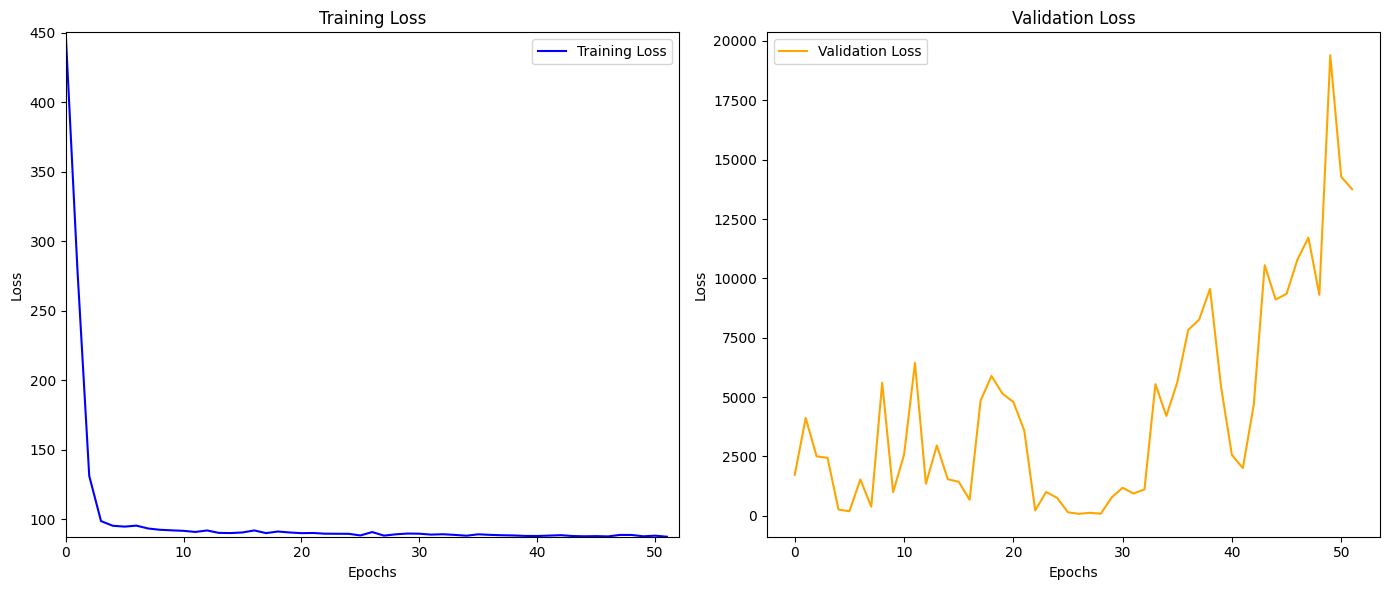

In [ ]:
import matplotlib.pyplot as plt

# Create two subplots for training and validation loss
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot training loss on the first subplot
axes[0].plot(history.history['loss'], label='Training Loss', color='blue')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()

# Zoom in on the training loss plot (example: focusing on epochs within the history range)
epochs = len(history.history['loss'])
axes[0].set_xlim(0, epochs)  # Set the x-axis to cover all epochs
axes[0].set_ylim(min(history.history['loss']), max(history.history['loss']))  # Set y-axis to cover full range of loss

# Plot validation loss on the second subplot
axes[1].plot(history.history['val_loss'], label='Validation Loss', color='orange')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Validation Loss')
axes[1].legend()

# Optionally zoom in on validation loss (if you want)
# axes[1].set_xlim(0, epochs)
# axes[1].set_ylim(min(history.history['val_loss']), max(history.history['val_loss']))

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print(f"Mean Squared Error (Linear Regression): {mse_lr}")
print(f"Mean Absolute Error (Linear Regression): {mae_lr}")



Mean Squared Error (Linear Regression): 100693.01159161559
Mean Absolute Error (Linear Regression): 15.146487364873243


In [ ]:
# Evaluate the model on the test data
mse = model.evaluate(X_test_scaled, y_test)

# Print the Mean Squared Error (MSE)
print(f'Mean Squared Error on test set: {mse}')
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")




48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.7274
Mean Squared Error on test set: 85.97503662109375
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 6.361164093017578


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import xgboost as xgb

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the models
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)




# Calculate evaluation metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Print XGBoost results
print(f"XGBoost - MSE: {mse_xgb}")
print(f"XGBoost - MAE: {mae_xgb}")




XGBoost - MSE: 81.2894058227539
XGBoost - MAE: 6.134415626525879


In [ ]:
import numpy as np

# Function to make predictions using either Random Forest or XGBoost
def predict_battery_life(model, label_encoder, scaler, type_discharge, Capacity, Re, Rct):
    # Encode the categorical feature
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]

    # Prepare the input feature vector
    X_input = np.array([[type_discharge_encoded, Capacity, Re, Rct]])

    # Scale the input features using the same scaler
    X_input_scaled = scaler.transform(X_input)

    # Predict the battery life (ambient_temperature) using the provided model
    predicted_battery_life = model.predict(X_input_scaled)

    return predicted_battery_life[0]

# Example input for prediction
type_discharge = 'discharge'  # Example input for type
Capacity = 1.674305           # Example numeric value
Re = -4.976500e+11            # Example numeric value
Rct = 1.055903e+12            # Example numeric value


# Example: Predicting with XGBoost model
predicted_battery_life_xgb = predict_battery_life(xgb_model, label_encoder, scaler, type_discharge, Capacity, Re, Rct)
print(f"Predicted Battery Life with XGBoost: {predicted_battery_life_xgb}")


Predicted Battery Life with XGBoost: 26.140304565429688


c:\Users\sheet\Desktop\MLProject\batterylifeprediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

def predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model):

    # Encode the categorical feature
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]

    # Prepare the input feature vector
    X_input = np.array([[type_discharge_encoded,Capacity, Re, Rct]])

    # Scale the input features using the same scaler
    X_input_scaled = scaler.transform(X_input)

    # Predict the battery life (ambient_temperature)

    predicted_battery_life = np.clip(model.predict(X_input_scaled), a_min=0, a_max=None)
    return predicted_battery_life[0]


In [ ]:
# Example usage of the function
type_discharge = 'discharge'  # Example input for type
Capacity = 1.674305           # Example numeric value
Re = -4.976500e+11            # Example numeric value
Rct = 1.055903e+12            # Example numeric value

# Call the prediction function
predicted_battery_life = predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model)

print(f"Predicted Battery Life: {predicted_battery_life}")

c:\Users\sheet\Desktop\MLProject\batterylifeprediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Predicted Battery Life: [28.418615]


In [ ]:
type_discharge = 'discharge'  # Example discharge type
Capacity = 2.0                 # Battery capacity in Ah (e.g., 2,000 mAh)
Re = 0.05                     # Electrolyte resistance in Ohms
Rct = 50                      # Charge transfer resistance in Ohms

predicted_battery_life = predict_battery_life(
    type_discharge, Capacity, Re, Rct, label_encoder, scaler, model
)


print(f"Predicted Battery Life: {predicted_battery_life}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Battery Life: [18.927336]


c:\Users\sheet\Desktop\MLProject\batterylifeprediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# import matplotlib.pyplot as plt

# # Function to plot comparison of model performance
# def plot_model_comparison(y_test, y_pred_rf, y_pred_xgb):
#     # 1. Plotting Predicted vs Actual Values for RandomForest and XGBoost
#     plt.figure(figsize=(14, 7))

#     # Plotting RandomForest predictions
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_test, y_pred_rf, color='blue', label='RandomForest Predictions')
#     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
#     plt.title('RandomForest: Predicted vs Actual')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.legend()

#     # Plotting XGBoost predictions
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost Predictions')
#     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
#     plt.title('XGBoost: Predicted vs Actual')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

# # Example usage for comparing models
# # Assuming y_test (true values), y_pred_rf (RandomForest predictions), and y_pred_xgb (XGBoost predictions) are available
# y_pred_rf = rf_model.predict(X_test_scaled)
# y_pred_xgb = xgb_model.predict(X_test_scaled)

# # Plot comparison without metrics
# plot_model_comparison(y_test, y_pred_rf, y_pred_xgb)


In [ ]:
import pickle

# Save the model, scaler, and label encoder to disk
with open('battery_life_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [ ]:
model.save("battery_life_model.h5")